<a href="https://colab.research.google.com/github/viicguimaraes14/Extracting-frames/blob/main/extrair_frames_yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install --upgrade youtube_dl

In [ ]:
!pip install youtube_transcript_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install youtube-dl==2020.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 31.2 MB/s 


In [ ]:
!pip install pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import module
import cv2
import datetime
from matplotlib import pyplot as plt
import pafy
import numpy as np
import glob
from PIL import Image
import pandas as pd
%reload_ext google.colab.data_table
from google.colab import data_table
from youtube_transcript_api import YouTubeTranscriptApi

#Pegando o video direto do youtube

In [ ]:
#Inserir aqui o vídeo ID
videoId = ""

In [ ]:
url = "https://www.youtube.com/watch?v=" + videoId
video = pafy.new(url)
best  = video.getbest(preftype="mp4")

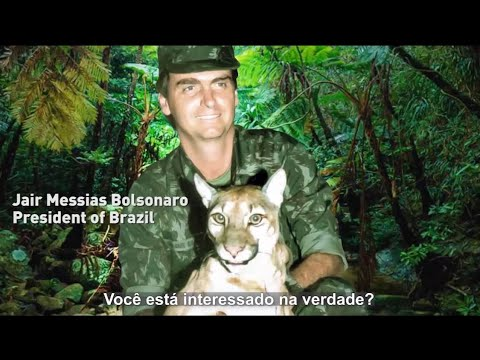

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
v = YouTubeVideo(videoId, width=500)
display(v)

In [ ]:
video.category

'News & Politics'

In [ ]:
video.title

'A verdade da preservação ambiental comparando o Brasil ao mundo.'

#Find the video time using framesCount and FPS

In [ ]:
best.dimensions

(1280, 720)

In [ ]:
# create video capture object
data = cv2.VideoCapture(best.url)
  
# count the number of frames
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = int(data.get(cv2.CAP_PROP_FPS))
print(fps)
  
# calculate dusration of the video
seconds = int(frames / fps)
video_time = str(datetime.timedelta(seconds=seconds))
print("duration in seconds:", seconds)
print("video time:", video_time)

30
duration in seconds: 152
video time: 0:02:32


#Get Caption

In [ ]:
#formata o valor de segundos para hh:mm:ss 
def format_time(segundo):
    return str(datetime.timedelta(seconds=segundo))

In [ ]:
try:
    #acessa o caption do video e add na lista de allCaptions
    caption = YouTubeTranscriptApi.get_transcript(videoId,languages=["pt"])
except:
    #caso não tenha caption
    print("Caption desativado")
df_caption = pd.DataFrame(caption)
df_caption['end'] = df_caption.sum(axis=1)
df_caption.insert(2, 'td_inicial', df_caption.start.apply(format_time)) # td_inicial = tempo de display inicial (hh:mm:ss)
df_caption.insert(3, 'td_final', df_caption.end.apply(format_time)) # td_final = tempo de display inicial (hh:mm:ss)
df_caption = df_caption.drop(['start', 'duration','end'],axis=1) # removendo a coluna start
df_caption

Caption desativado


NameError: ignored

In [ ]:
df_caption

NameError: ignored

#Extract all frames from a particula time interval

In [ ]:
tempoInicial = '0:00:00'
tempoFinal = '0:02:32'

In [ ]:
tempoFinal >= tempoInicial

True

In [ ]:
#pega frames com o tempo em que acontece
Indexframe=0
countFrame=1
tempos = []
nomeFrames = []
cap = cv2.VideoCapture(best.url)
fps = int(cap.get(cv2.CAP_PROP_FPS))
print("FPS: ", fps)
while(cap.isOpened()):
    ret, frame = cap.read()
    #calculando o tempo de ocorrencia
    seconds = int(Indexframe/fps)
    frame_time = str(datetime.timedelta(seconds=seconds))
    if (frame_time >= tempoInicial):
        if frame_time >= tempoFinal: break ##estipula um tempo máx para leitura de frames
        if ret == False: break
        if Indexframe%30 == 0: 
            nome = "img" + str(countFrame)+ '.jpg'
            tempos.append(frame_time)
            nomeFrames.append(nome)
            cv2.imwrite('/content/drive/MyDrive/Experimentos Qualificação - Cris Cirino/Video 25/Frames extraídos do YT/' + nome, frame)
            print('Read a new frame {} at time {}'.format(nome,frame_time))
            countFrame += 1
    Indexframe += 1
    
cap.release()
cv2.destroyAllWindows()

#relação entre o frame extraido com o seu tempo de acontecimento no vídeo
df_framesExtraidos = {
    'tempo' : tempos,
    'frame' : nomeFrames
}

columns = ['tempo','frame']

df_framesExtraidos = pd.DataFrame(data=df_framesExtraidos, columns=columns)
df_framesExtraidos



FPS:  30
Read a new frame img1.jpg at time 0:00:00
Read a new frame img2.jpg at time 0:00:01
Read a new frame img3.jpg at time 0:00:02
Read a new frame img4.jpg at time 0:00:03
Read a new frame img5.jpg at time 0:00:04
Read a new frame img6.jpg at time 0:00:05
Read a new frame img7.jpg at time 0:00:06
Read a new frame img8.jpg at time 0:00:07
Read a new frame img9.jpg at time 0:00:08
Read a new frame img10.jpg at time 0:00:09
Read a new frame img11.jpg at time 0:00:10
Read a new frame img12.jpg at time 0:00:11
Read a new frame img13.jpg at time 0:00:12
Read a new frame img14.jpg at time 0:00:13
Read a new frame img15.jpg at time 0:00:14
Read a new frame img16.jpg at time 0:00:15
Read a new frame img17.jpg at time 0:00:16
Read a new frame img18.jpg at time 0:00:17
Read a new frame img19.jpg at time 0:00:18
Read a new frame img20.jpg at time 0:00:19
Read a new frame img21.jpg at time 0:00:20
Read a new frame img22.jpg at time 0:00:21
Read a new frame img23.jpg at time 0:00:22
Read a new 

,tempo,frame
0,0:00:00,img1.jpg
1,0:00:01,img2.jpg
2,0:00:02,img3.jpg
3,0:00:03,img4.jpg
4,0:00:04,img5.jpg
...,...,...
147,0:02:27,img148.jpg
148,0:02:28,img149.jpg
149,0:02:29,img150.jpg
150,0:02:30,img151.jpg


#-----------------------------------caption---------------------------------------------------------------------------------------------

In [ ]:
fala = []
d = df_caption.to_dict(orient="index")
for t in df_framesExtraidos.tempo:
    f = []
    for i in range(len(df_caption.td_final)):
        if ((df_caption.td_inicial[i] <= t) and (t <= df_caption.td_final[i])): 
            f.append(d[i])
            print(t)
    #print(f)    
    fala.append(f)

NameError: ignored

In [ ]:
df_framesExtraidos['caption'] = fala
df_framesExtraidos

ValueError: ignored

In [ ]:
#salva em um .tempo-image-='csv
#df_framesExtraidos.to_csv('/content/drive/MyDrive/1 - IA - ViU/Comunicação e IA/APIs - codes samples/4 - Experimentos/Live do JB - 22 04 2021/h2_tempo-img-fala.csv', encoding='utf-8')